Na laboratorium interesują nas przede wszystkim biblioteki scipy.signal i scipy.fftpack

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#### 1. Wygeneruj sygnał funkcji wielomianowej (np y=x**3-2*x**2+7) o zaburzeniu Gaussowskim z odchyleniem standardowym 1, dla 1000 punktów w zakresie [0,10]. Wykonaj uśrednienia tego sygnału przy pomocy średniej kroczącej, albo splotu przy pomocy filtru kwadratowego, trójkątnego lub Gaussowskiego. Wyniki zaprezentuj na wykresach (liniowych).

In [2]:
f = lambda x: x**3 -2*x**2+7 + np.random.normal(0, 1, size=x.shape)

In [38]:
x = np.linspace(0,2, 1000)
y = f(x)

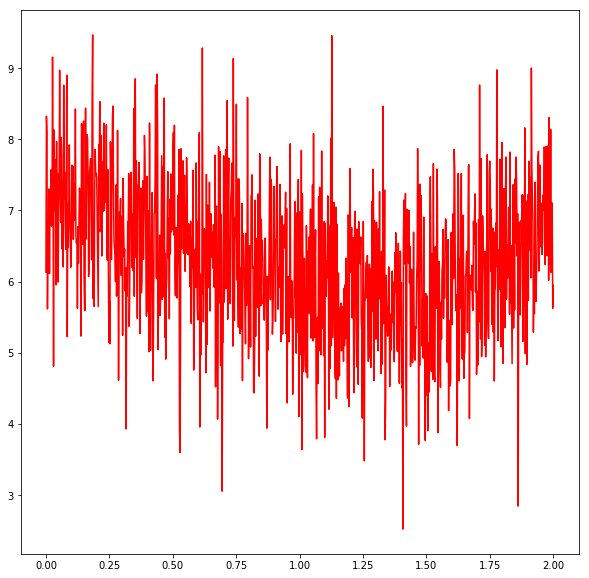

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'r-')

## MM

In [40]:
def moving_mean_filter(y, window):
    if window == 0:
        return y
    filtered = []
    for i in range(y.shape[0]):
        mean = y[max(0, i-window): i+window].mean()
        filtered.append(mean)
    return np.array(filtered)

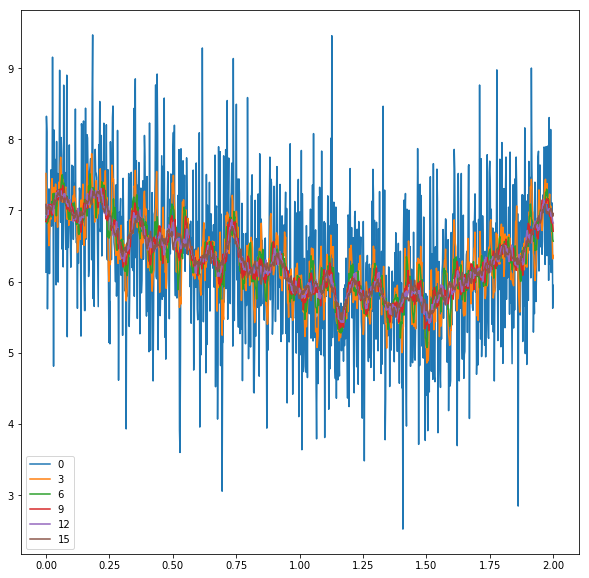

In [41]:
plt.figure(figsize=(10, 10))
for i in range(0, 18, 3):
    y_mm_filtered = moving_mean_filter(y, i)
    plt.plot(x, y_mm_filtered, '-', label=i)
    plt.legend()

## Conv

In [49]:
def convolution(y, window):
    if len(window) == 0:
        return y
    y_conv_filtered = signal.convolve(y, window/sum(window), mode='same')
    return y_conv_filtered
    

### BOX

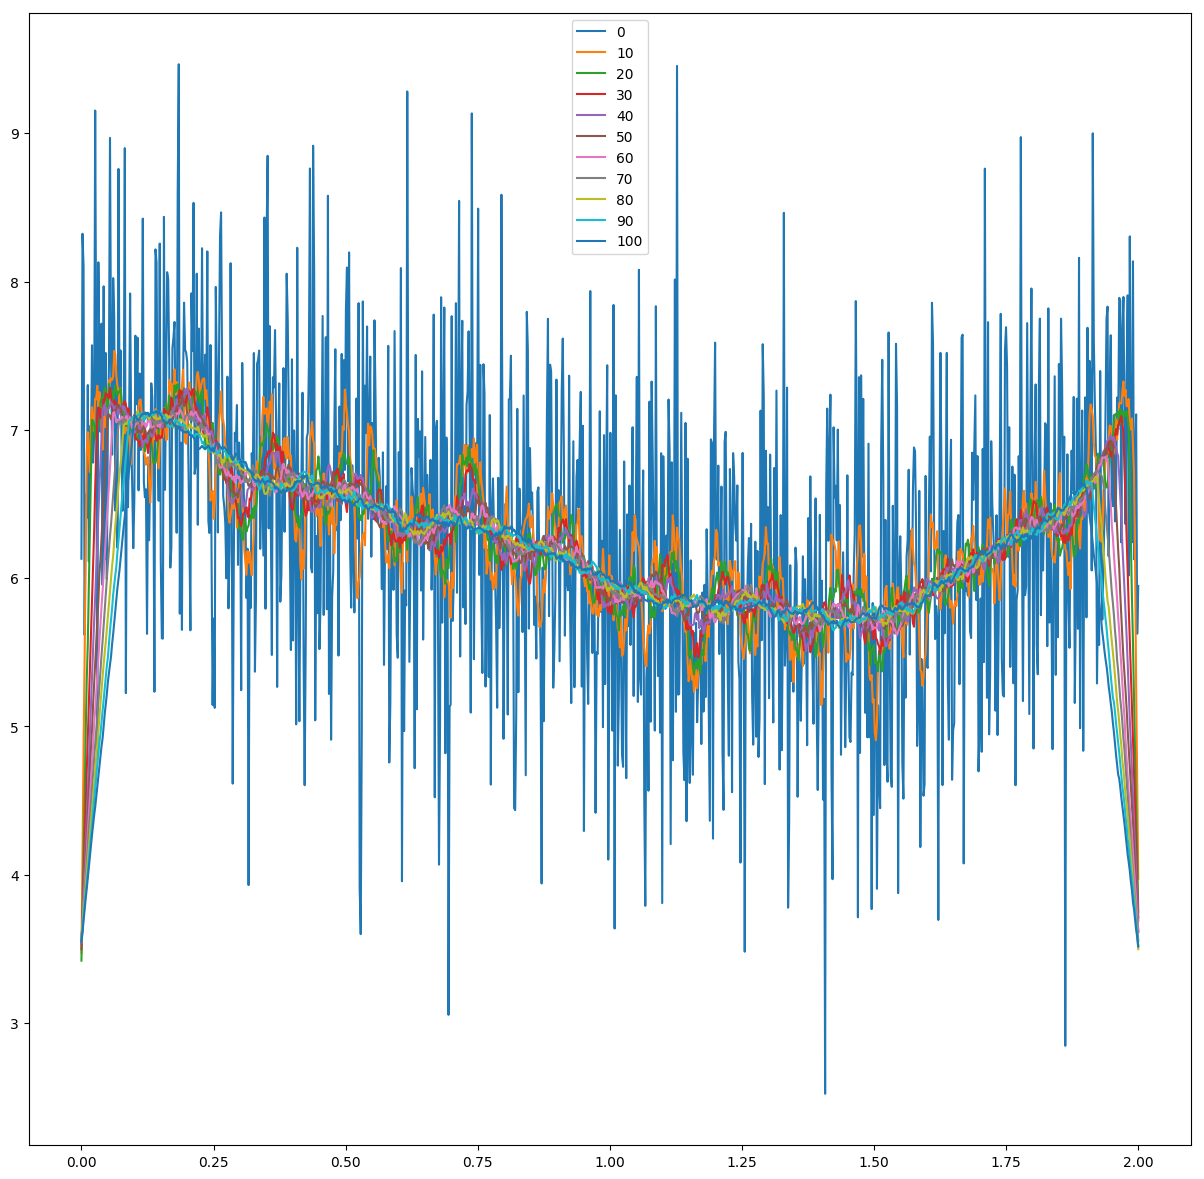

In [50]:
plt.figure(figsize=(15, 15), dpi=100)
for i in range(0, 101, 10):
    y_conv_filtered = convolution(y, signal.windows.boxcar(i))
    plt.plot(x, y_conv_filtered, '-', label=i)
    plt.legend()

### Triangle

In [46]:
signal.windows.triang(10)

array([0.1, 0.3, 0.5, 0.7, 0.9, 0.9, 0.7, 0.5, 0.3, 0.1])

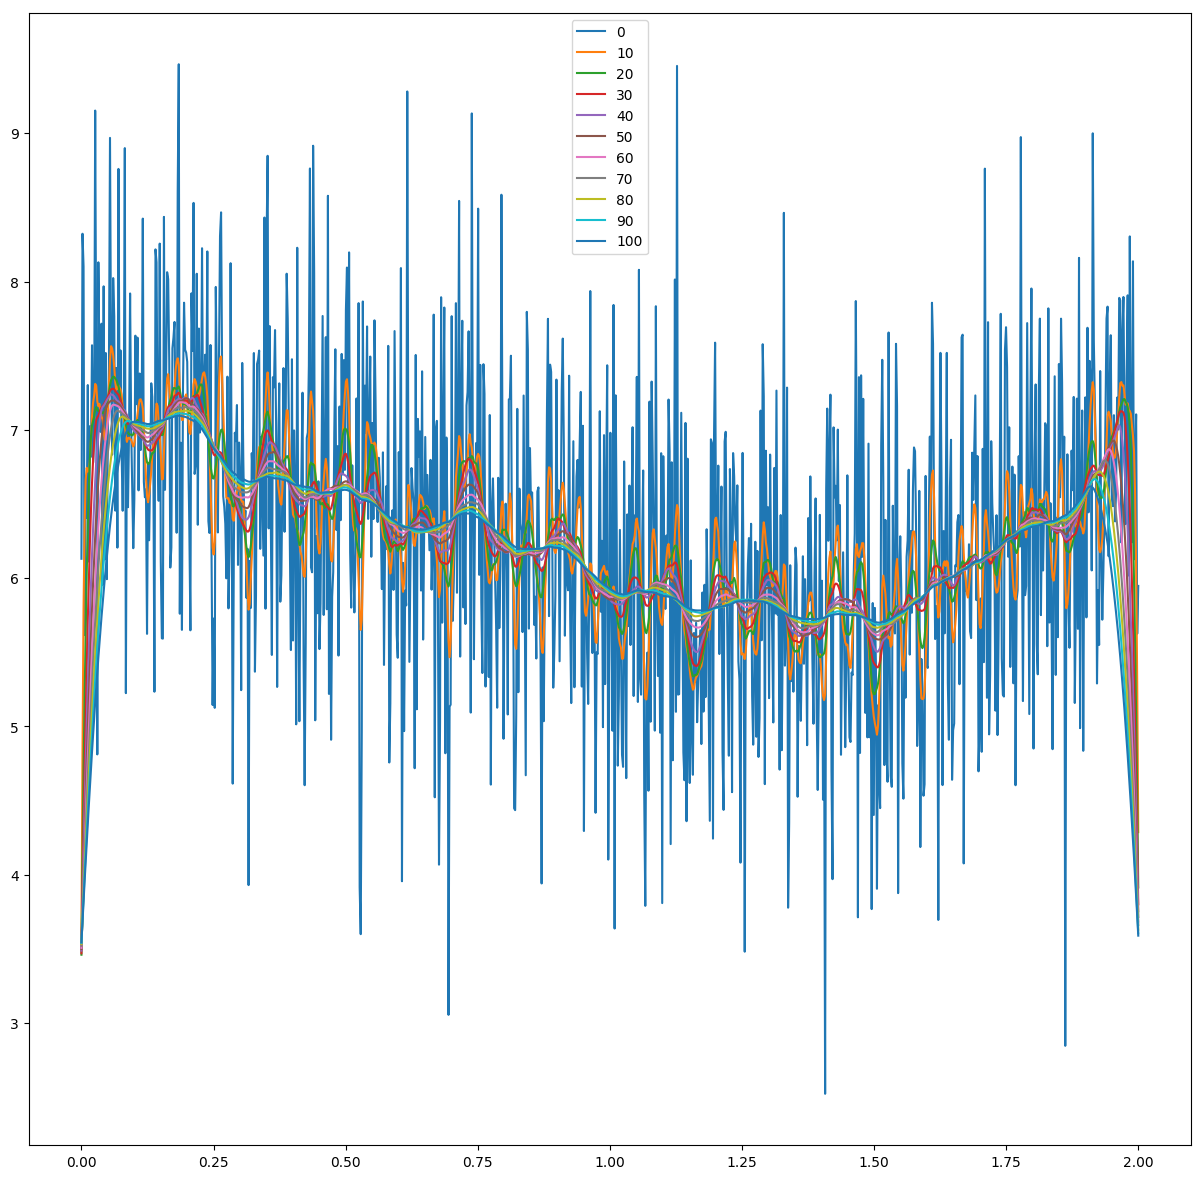

In [54]:
plt.figure(figsize=(15, 15), dpi=100)
for i in range(0, 101, 10):
    y_conv_filtered = convolution(y, signal.windows.triang(i))
    plt.plot(x, y_conv_filtered, '-', label=i)
    plt.legend()

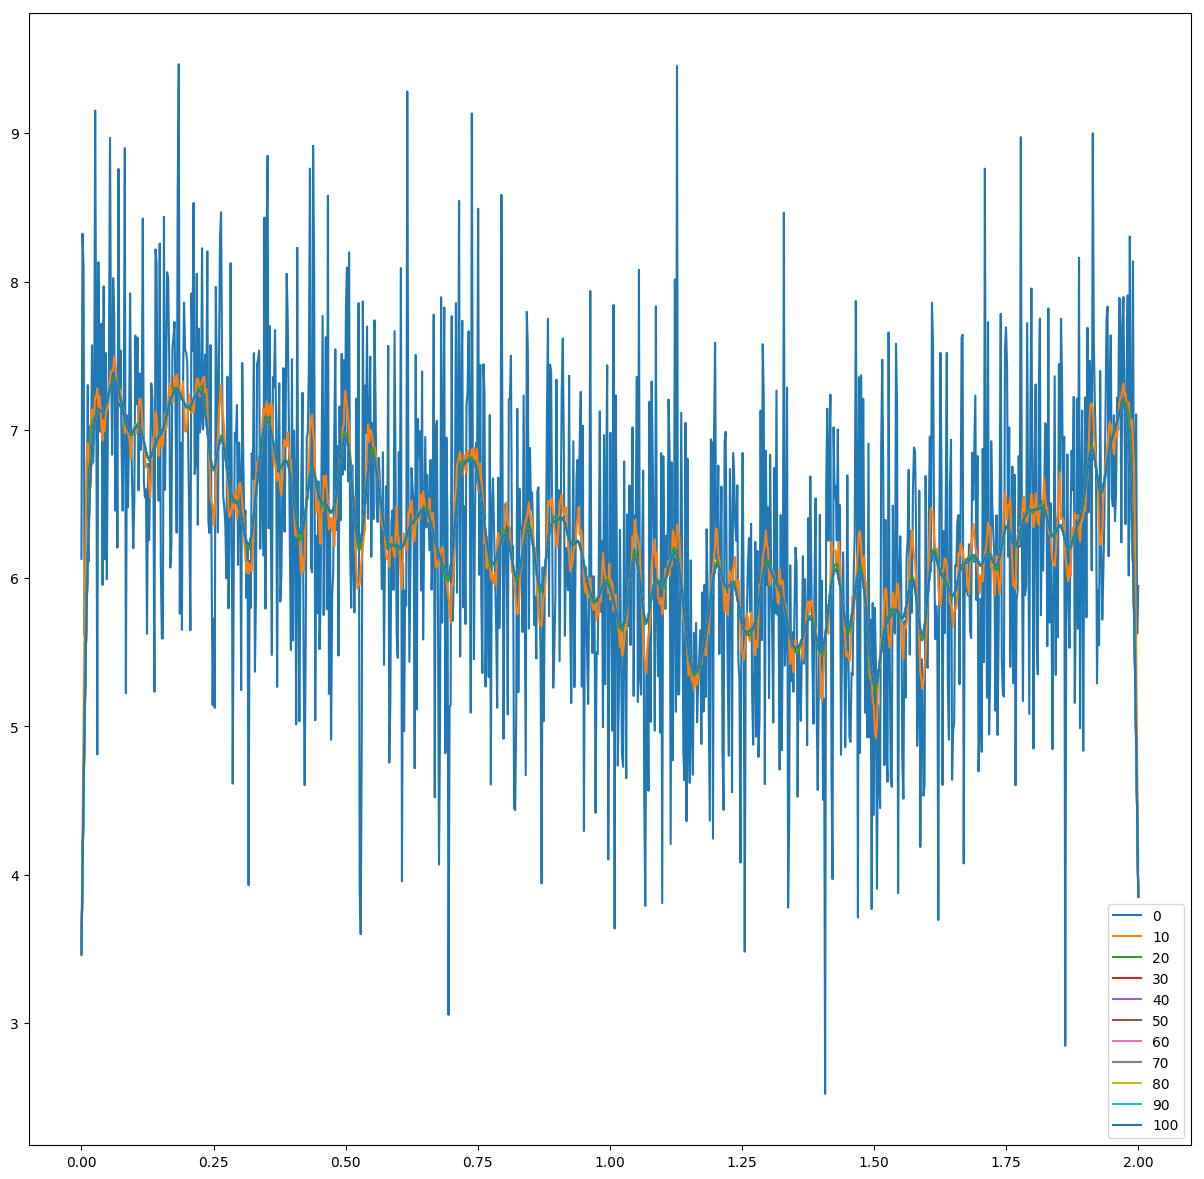

In [56]:
plt.figure(figsize=(15, 15), dpi=100)
for i in range(0, 101, 10):
    y_conv_filtered = convolution(y, signal.windows.gaussian(i, 5.))
    plt.plot(x, y_conv_filtered, '-', label=i)
    plt.legend()

#### 2. Pobierz sygnał o zajętości nukleosomowej z plików pochodzących z eksperymentu MNase-Seq ( dane tu w formacie bedgraph ) . Wczytaj go do numpy jako wektor. Przedstaw go na wykresie. Używając szybkiej trasformaty fouriera oblicz widmo Fourierowskie tego sygnału. Przedstaw je na innym wykresie. Wyzeruj część widma wysokich częstotliwości i dokonaj odwrotnej transformaty Fouriera, aby uzyskać wygładzony sygnał zajętości nukleosomami. Spróbuj tak dobrać parametry filtra, aby wykres po odwrotnej transformacie Fouriera miał okres zbliżony do 160-200 par zasad.